In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel(r'D:\MSc Software and AI\Team Project\TurbineTeamProject\data\dundalk_2020.xlsx')

In [8]:
df.head()

,Timestamps,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow,...,RotorRPM,EnvirTemp,NacelTemp,GearOilTemp,GearBearTemp,GenTemp,GenPh1Temp,GenPh2Temp,GenPh3Temp,GenBearTemp
0,2020-01-01 00:00:00,2.4,0.4,153.7,-6.6,-0.7,-0.5,-4.5,0.6,-0.7,...,18.4,9,18,43,56,999,40,50,41,39
1,2020-01-01 00:10:00,2.8,0.6,164.0,4.1,-0.8,-0.5,-4.5,0.6,-0.8,...,18.9,9,19,44,58,999,40,50,41,40
2,2020-01-01 00:20:00,2.8,0.5,175.5,5.6,-0.8,-0.5,-4.5,0.6,-0.8,...,20.0,9,19,44,59,999,40,50,41,40
3,2020-01-01 00:30:00,2.6,0.4,188.6,4.5,-0.9,-0.5,-4.4,0.6,-0.8,...,19.6,9,19,44,59,999,40,50,41,41
4,2020-01-01 00:40:00,2.7,0.4,201.0,4.2,-0.7,-0.5,-4.5,0.5,-0.7,...,19.0,9,19,44,59,999,40,50,41,41


In [11]:
df.columns

turbine_cols = ['Pitch', 'GenRPM', 'RotorRPM', 'EnvirTemp', 'NacelTemp', 'GearOilTemp',
       'GearBearTemp', 'GenTemp', 'GenPh1Temp', 'GenPh2Temp', 'GenPh3Temp',
       'GenBearTemp']

In [12]:
df = df.drop(turbine_cols, axis = 1)

In [15]:
df.set_index(['Timestamps'], inplace= True)

In [16]:
df.head()

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow
Timestamps,,,,,,,,,
2020-01-01 00:00:00,2.4,0.4,153.7,-6.6,-0.7,-0.5,-4.5,0.6,-0.7
2020-01-01 00:10:00,2.8,0.6,164.0,4.1,-0.8,-0.5,-4.5,0.6,-0.8
2020-01-01 00:20:00,2.8,0.5,175.5,5.6,-0.8,-0.5,-4.5,0.6,-0.8
2020-01-01 00:30:00,2.6,0.4,188.6,4.5,-0.9,-0.5,-4.4,0.6,-0.8
2020-01-01 00:40:00,2.7,0.4,201.0,4.2,-0.7,-0.5,-4.5,0.5,-0.7


In [17]:
df.describe()

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow
count,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000,10097.000000
mean,7.457859,1.073032,238.217530,-0.860335,294.023542,443.496752,129.337437,68.132663,-0.063197
std,3.449861,0.626736,47.105654,19.131134,274.471214,356.120955,149.012063,60.226366,0.412417
min,0.200000,0.000000,0.000000,-177.200000,-4.300000,-3.700000,-48.200000,0.000000,-5.500000
25%,5.100000,0.600000,216.700000,-2.400000,46.800000,96.100000,2.700000,14.000000,0.000000
50%,7.500000,1.000000,242.100000,-0.100000,214.900000,396.500000,81.100000,53.600000,0.000000
75%,9.700000,1.400000,264.300000,2.100000,503.100000,884.800000,200.500000,117.100000,0.000000
max,19.000000,4.400000,359.600000,179.900000,851.000000,925.300000,834.700000,417.600000,3.700000


In [18]:
negative_power = df[df['Power']< 0]

In [19]:
len(negative_power)

1748

In [20]:
negative_power.describe()

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow
count,1748.000000,1748.000000,1748.000000,1748.000000,1748.00000,1748.000000,1748.000000,1748.000000,1748.000000
mean,3.373055,0.647654,242.001316,-4.798627,-0.66087,-0.322597,-4.600458,0.477403,-0.522941
std,3.336297,0.649733,70.024209,45.420075,0.30755,3.848261,1.199203,0.317364,0.549720
min,0.200000,0.000000,0.800000,-177.200000,-4.30000,-3.700000,-12.700000,0.000000,-5.500000
25%,1.700000,0.300000,202.475000,-10.100000,-0.70000,-0.500000,-4.700000,0.300000,-0.700000
50%,2.400000,0.500000,251.100000,-0.500000,-0.60000,-0.500000,-4.600000,0.400000,-0.500000
75%,3.000000,0.700000,294.800000,5.025000,-0.60000,-0.500000,-4.500000,0.600000,-0.300000
max,19.000000,4.200000,359.600000,179.900000,-0.10000,118.500000,-0.300000,7.000000,2.500000


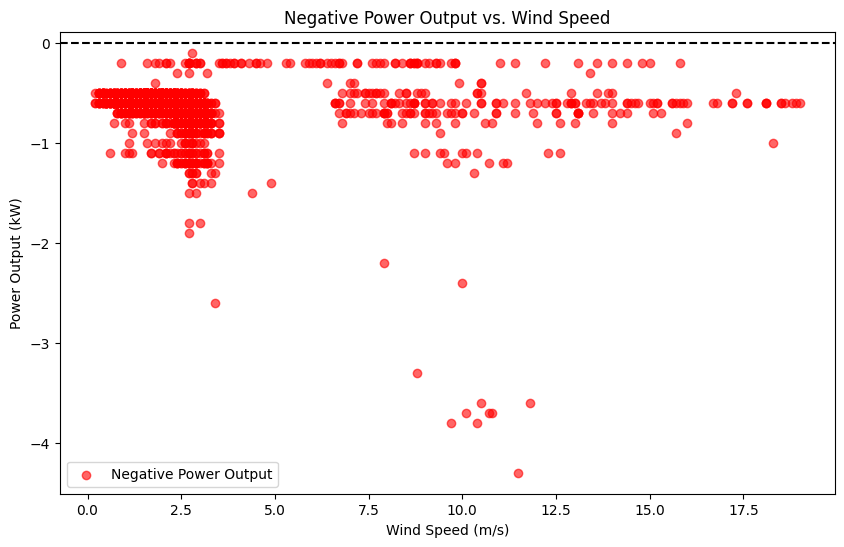

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(negative_power['WindSpeed'], negative_power['Power'], color='red', alpha=0.6, label="Negative Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.title("Negative Power Output vs. Wind Speed")
plt.axhline(y=0, color='black', linestyle='--')  # Reference line at 0 kW
plt.legend()
plt.show()

Saved categorized negative power readings:
- Low wind (<3 m/s): 1297 readings
- Normal wind (3-20 m/s): 420 readings
- High wind (>20 m/s): 31 readings


C:\Users\rsaxe\AppData\Local\Temp\ipykernel_4424\1079395971.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_power['z_score'] = stats.zscore(negative_power['Power'])


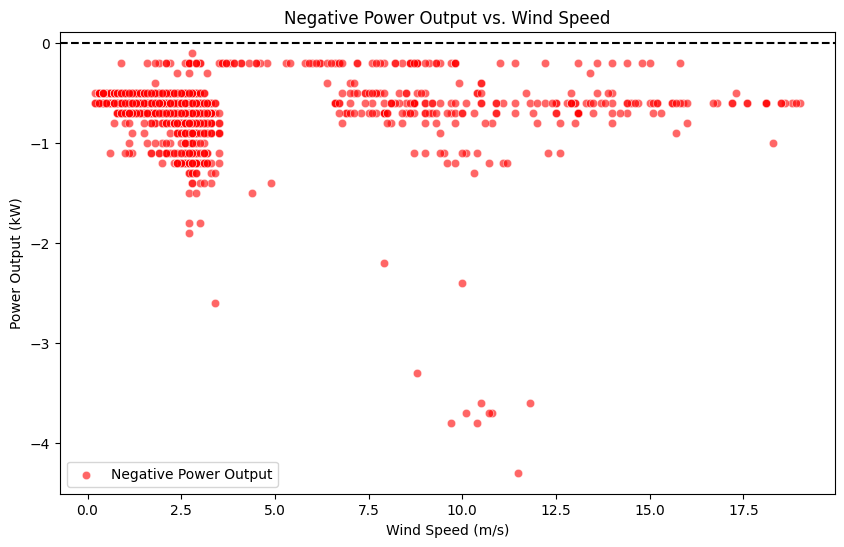

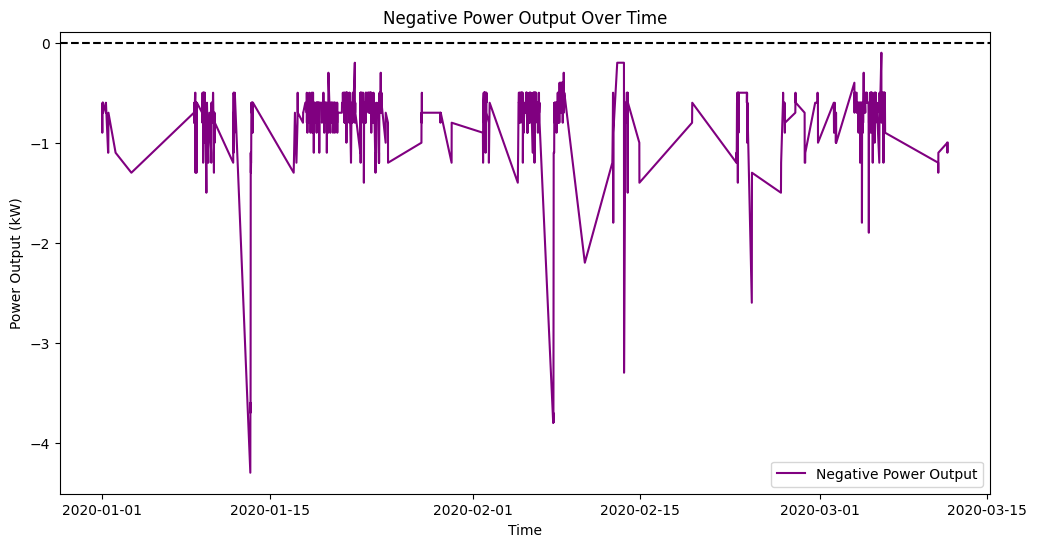

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Categorize by Wind Speed Ranges
low_wind = negative_power[negative_power['WindSpeed'] < 3]      # Below Cut-in speed
normal_wind = negative_power[(negative_power['WindSpeed'] >= 3) & (negative_power['WindSpeed'] <= 15)]  # Normal range
high_wind = negative_power[negative_power['WindSpeed'] > 15]    # Possible cut-out condition


print(f"Saved categorized negative power readings:")
print(f"- Low wind (<3 m/s): {len(low_wind)} readings")
print(f"- Normal wind (3-20 m/s): {len(normal_wind)} readings")
print(f"- High wind (>20 m/s): {len(high_wind)} readings")


negative_power['z_score'] = stats.zscore(negative_power['Power'])
anomalies = negative_power[negative_power['z_score'].abs() > 3]  # Z-score threshold for outliers



# Plot Negative Power Output vs. Wind Speed
plt.figure(figsize=(10,6))
sns.scatterplot(x=negative_power['WindSpeed'], y=negative_power['Power'], color='red', alpha=0.6, label="Negative Power Output")
plt.axhline(y=0, color='black', linestyle='--')  # Reference line at 0 kW
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.title("Negative Power Output vs. Wind Speed")
plt.legend()
plt.show()

# Time-Series Analysis: Plot Negative Power Output Over Time
plt.figure(figsize=(12,6))
plt.plot(negative_power.index, negative_power['Power'], color='purple', label="Negative Power Output")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Power Output (kW)")
plt.title("Negative Power Output Over Time")
plt.legend()
plt.show()


## NOTE:
Dataset contains negative Power values:

Intial search :
dependednt on wind speed:
<ul>
<li>can be due to down-time</li>
<li>sensor error</li>
<li>or malfuntion. </li>
</ul>

Solution:

<ol>
<li>Turn Negative values 0: Might effect the accuracy</li>
<li>Min-Max Scaling or log sacaling: best option for now</li>
<li>Drop -ve values: Desruptive not recommeneded </li>
<li>Interpolation: Difficult and computational</li>
</ol>

In [ ]:
# 1